In [1]:
import os
from PIL import Image
import rasterio
from rasterio.plot import reshape_as_image
import rasterio.mask
from rasterio.features import rasterize
import matplotlib
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping, Point, Polygon
from shapely.ops import cascaded_union

import numpy as np
import matplotlib.pyplot as plt

def generate_mask(raster_path, shape_path, output_path, file_name):
    
    """Os CRS devem ser iguais para gerar a máscara binária
    
    raster_path = local onde a imagem .tif esta localizada;

    shape_path = local onde o Shapefile ou GeoJson está localizado.

    output_path = local onde será salva a máscara binária gerada.

    file_name = nome do aquivo que será gerado.
    
    
    """
    
    #Carregar o Raster
    
    with rasterio.open(raster_path, "r") as src:
        raster_img = src.read()
        raster_meta = src.meta
    
    #Carregar o shapefile ou GeoJson
    train_df = gpd.read_file(shape_path)
    
    #Verificar se o CRS é o mesmo
    if train_df.crs != src.crs:
        print(" crs do Raster : {} e Crs do Vetor : {}.\n Converta para o mesmo Sistema de Coordenadas de Referência!".format(src.crs,train_df.crs))
        
        
    #Função para gerar a máscara
    def poly_from_utm(polygon, transform):
        poly_pts = []

        poly = cascaded_union(polygon)
        for i in np.array(poly.exterior.coords):

            poly_pts.append(~transform * tuple(i))

        new_poly = Polygon(poly_pts)
        return new_poly
    
    
    poly_shp = []
    im_size = (src.meta['height'], src.meta['width'])
    for num, row in train_df.iterrows():
        if row['geometry'].geom_type == 'Polygon':
            poly = poly_from_utm(row['geometry'], src.meta['transform'])
            poly_shp.append(poly)
        else:
            for p in row['geometry']:
                poly = poly_from_utm(p, src.meta['transform'])
                poly_shp.append(poly)

    mask = rasterize(shapes=poly_shp,
                     out_shape=im_size)
    
    
    plt.figure(figsize=(15,15))
    plt.imshow(mask)
    #Salvar
    mask = mask.astype("uint16")
    
    bin_mask_meta = src.meta.copy()
    bin_mask_meta.update({'count': 1})
    os.chdir(output_path)
    with rasterio.open(file_name, 'w', **bin_mask_meta) as dst:
        dst.write(mask * 255, 1)



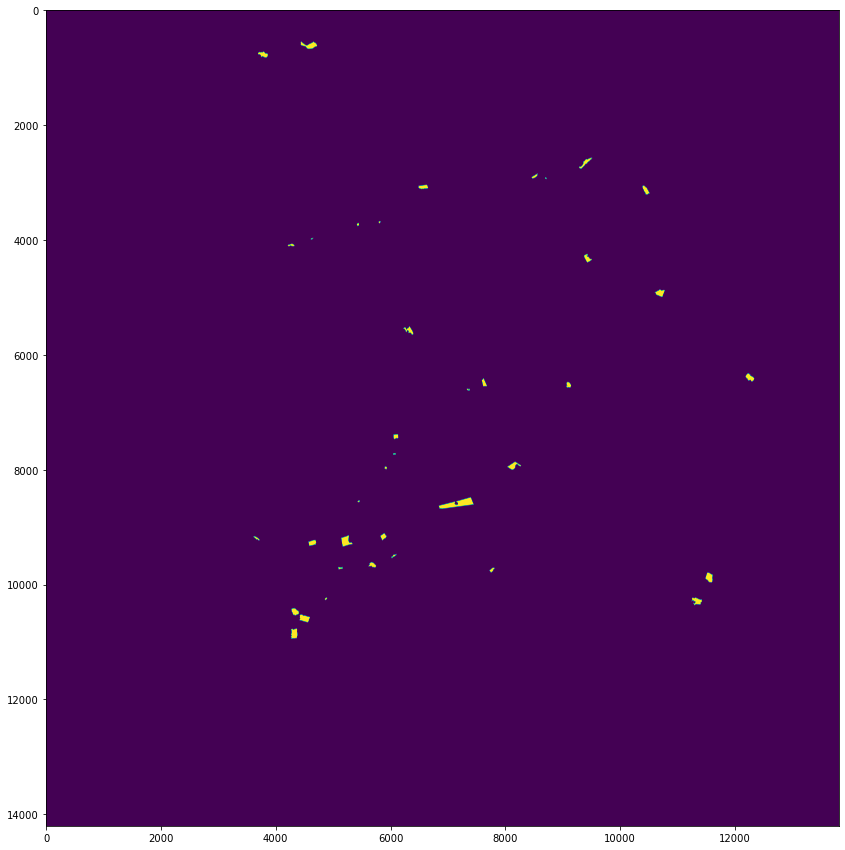

In [11]:

raster_path = '../Raster/Image/apui_after_burn_32721_UInt16.tif'
shape_path_1 = '../Shape/shape_id_1_32721.geojson'
output_path = '../Binary Masks'
file_name_1 = 'binary_mask_id_1.tif'



#generate_mask(raster_path,shape_path_1,output_path,file_name_1)

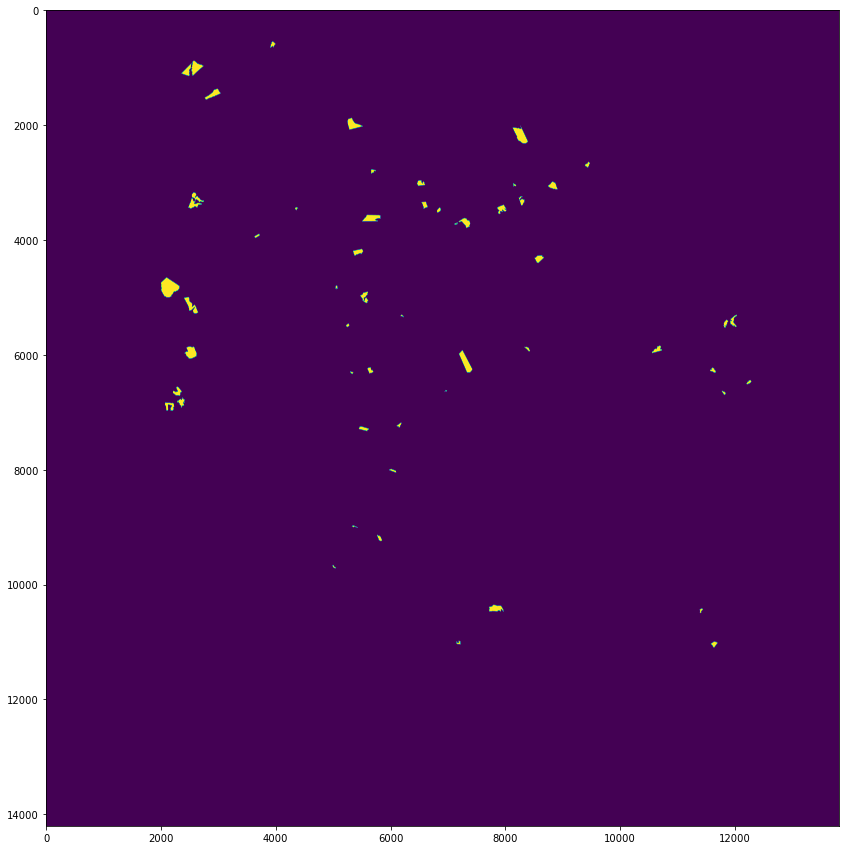

In [12]:
raster_path = '../Raster/Image/apui_after_burn_32721_UInt16.tif'
shape_path_2 = '../Shape/shape_id_2_32721.geojson'
output_path = '../Binary Masks'
file_name_2= 'binary_mask_id_2.tif'



#generate_mask(raster_path,shape_path_2,output_path,file_name_2)

In [2]:
path = '/home/bernard/Documents/IME/Iniciação Científica/Data/Binary Masks/binary_mask_id_1.tif'
path2 = '/home/bernard/Documents/IME/Iniciação Científica/Data/Binary Masks/binary_mask_id_2.tif'

In [2]:
raster_before_path = '../Raster/Array/apui_before_array_red_nir.npy'
raster_after_path = '../Raster/Array/apui_after_array_red_nir.npy'
path = '../Binary Masks/binary_mask_id_1.tif'
path2 = '../Binary Masks/binary_mask_id_2.tif'
out_path = '../Binary Masks/Cortes/Corte_'
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

In [4]:

from generate_subimages import make_save_subimages
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload
make_save_subimages(raster_before_path,raster_after_path,path,path2,out_path,10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
